# Zmienna losowa dyskretna
### Statystyczna analiza danych
**dr inż. Wojciech Artichowicz**

**Katedra Geotechniki i Inżynierii Wodnej PG**

### Rozkład dwumianowy

Na przykładzie rozkładu dwumianowego omówione zostaną zasady pracy z rozkładami dyskretnymi z biblioteki [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html).

Rozkład dwumianowy opisuje liczbę sukcesów $k$ przy prowadzeniu $n$ niezależnych eksperymentów, jeśli prawdopodobieństwo sukcesu w pojedynczej próbie wynosi $p$. Rozkład prawdopodbieństwa tej zmiennej losowej dany jest wzorem:

$$p(k)= {n\choose k} p^k (1-p)^{n-k} $$



#### Dane

Rozważmy przykład rzutu uczciwą kostką sześcienną. Jako sukces określmy wyrzucenie ściany z sześcioma oczkami, zatem prawdopodobieństwo sukcesu w jednej próbie wynosi $p=1/6$. Załóżmy, że gra polega na dziesięciokrotnym ($n=10$) rzucie kostką. Określ rozkład prawdopodobieństwa liczby sukcesów $k$.

### Import bibliotek języka Python

In [1]:
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

### Utworzenie obiektu rozkładu dwumianowego

Zmienną losową o rozkładzie dwumianowym tworzy się przy użyciu funkcji [`binom()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom), która przyjmuje jako argumenty liczbę prób $n$ oraz prawdopodobieństwo sukcesu w pojedynczej próbie $p$.

In [2]:
n = 10
p = 1/6
RV = st.binom(n, p) # utworzenie zmiennej losowej o rozkładzie dwumianowym

Utworzenie listy zawierającej rozważaną liczbę sukcesów $k$ w $n$ próbach

In [3]:
k = np.array([i for i in range(n+1)])
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Obliczenie prawdopodobieństw dla wartości $k$:

In [4]:
RV.pmf(k)

array([1.61505583e-01, 3.23011166e-01, 2.90710049e-01, 1.55045360e-01,
       5.42658759e-02, 1.30238102e-02, 2.17063503e-03, 2.48072575e-04,
       1.86054431e-05, 8.26908584e-07, 1.65381717e-08])

**Wykres funkcji prawdopodobieństwa i dystrybuanty**

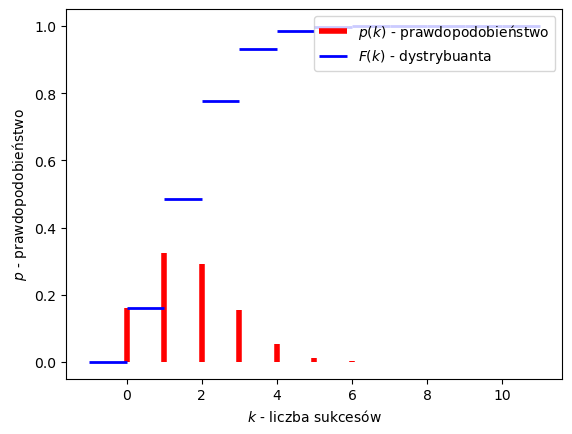

In [5]:
p = RV.pmf(k)
F = RV.cdf(k)
plt.vlines(k, 0, p, colors='r', lw=4)
plt.hlines(np.append([0],F), np.append([min(k)-1],k), np.append(k,[max(k)+1]), colors='b', lw=2)
plt.legend(["$p(k)$ - prawdopodobieństwo", "$F(k)$ - dystrybuanta"])
plt.xlabel("$k$ - liczba sukcesów")
plt.ylabel("$p$ - prawdopodobieństwo")
pass

#### Obliczanie kwantyli rozkładu dyskretnego

Do wyznaczenia kwantyla rozkładu służy metoda `ppf()`, która jako argument przyjmuje wartość prawdopodobieństwa $p\in (0,1)$

In [6]:
pq = 0.75
q = RV.ppf(pq) # obliczenie kwantyla rzędu p rozkładu
q

2.0

#### Obliczenia parametrów rozkładu

Mając utworzony obiekt rozważanego rozkładu prawdopodobieństwa można użyć metod pozwalających obliczać parametry tego rozkładu:

In [7]:
RV.expect() # wartość oczekiwana

1.666666666666667

In [8]:
RV.std() # odchylenie standardowe

1.1785113019775793

In [9]:
RV.median() # mediana

2.0

### Generowanie liczb losowych pochodzących z zadanego rozkładu

W celu wygenerowania wartości losowych (pseudolosowych) pochodzących z rozważanego tu rozkładu należy użyć metody `rvs()`. W celu określenia liczebności wygenerowanej próby pseudolosowej należy określić wartość argumentu `size`. Tu wygenerowanych zostanie 1000 wartości.

In [10]:
x = RV.rvs(size=1000)
x

array([2, 2, 3, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 3, 1, 2, 2, 3, 0, 3, 2, 1,
       2, 2, 2, 2, 6, 2, 1, 2, 1, 1, 2, 0, 3, 2, 0, 2, 1, 2, 1, 1, 2, 0,
       0, 2, 0, 0, 1, 3, 2, 0, 2, 1, 0, 4, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2,
       2, 2, 3, 1, 4, 3, 1, 1, 0, 1, 2, 1, 0, 2, 3, 3, 1, 2, 1, 3, 0, 2,
       2, 1, 0, 1, 1, 1, 2, 4, 2, 4, 2, 2, 3, 2, 1, 1, 1, 1, 2, 0, 0, 1,
       5, 1, 1, 2, 2, 1, 3, 1, 0, 2, 2, 2, 4, 1, 2, 0, 2, 4, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 3, 0, 1, 2, 2, 2, 2, 2, 3, 1, 1,
       1, 2, 1, 0, 0, 1, 2, 2, 1, 4, 3, 3, 0, 2, 0, 0, 1, 2, 3, 0, 3, 4,
       1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 3,
       3, 1, 3, 3, 5, 2, 0, 1, 2, 0, 4, 1, 3, 4, 1, 0, 2, 2, 3, 3, 2, 2,
       2, 4, 1, 5, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 3, 3, 2, 0, 0, 7, 1,
       0, 3, 1, 3, 2, 3, 2, 2, 3, 1, 2, 2, 0, 2, 1, 1, 1, 3, 0, 1, 0, 0,
       2, 2, 1, 3, 2, 1, 3, 1, 1, 4, 3, 3, 3, 0, 2, 2, 1, 4, 1, 4, 3, 7,
       1, 1, 4, 0, 1, 3, 0, 1, 2, 0, 2, 1, 1, 2, 2,

Aby zliczyć częstość występowania danej wartości w próbie, należy użyć funkcji [`unique()`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) z biblioteki [`numpy`](https://numpy.org/). Argument dodatkowy `return_counts=True` oznacza żądanie zwrócenia nie tylko unikalnych wartości, ale także zliczenia ich wystąpień.

In [11]:
ki, ni = np.unique(x,return_counts=True)
(ki,ni)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([157, 320, 300, 153,  54,  12,   2,   2]))

Na podstawie zliczonych wartości można obliczyć prawdopodobieństwo empiryczne (na podstawie wystąpień w próbie):

In [12]:
pi = ni/np.sum(ni)

Poniżej zaprezentowano wykres rozkładu prawdopodobieństwa otrzymany na podstawie próby.

Text(0, 0.5, '$p$ - prawdopodobieństwo')

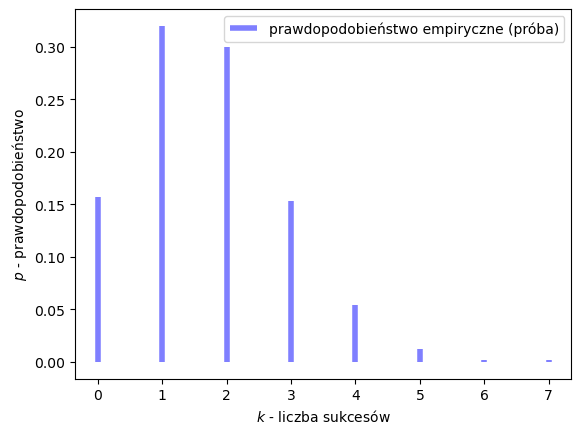

In [13]:
plt.vlines(ki,0,pi,color="blue",alpha=0.5,linewidth=4)
plt.legend(["prawdopodobieństwo empiryczne (próba)"])
plt.xlabel("$k$ - liczba sukcesów")
plt.ylabel("$p$ - prawdopodobieństwo")

Niżej porównano teoretyczny oraz empiryczny rozkład prawdopodobieńastwa.

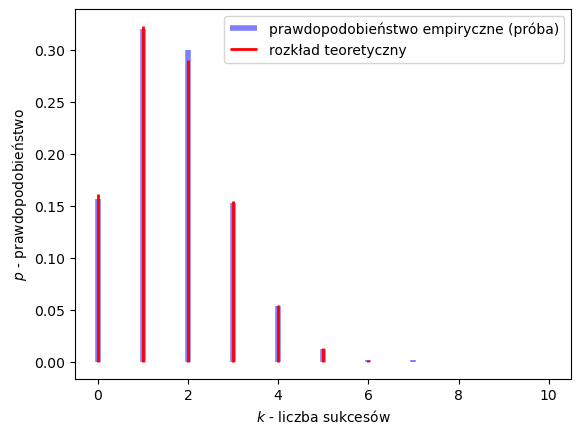

In [14]:
plt.vlines(ki,0,pi,color="blue",alpha=0.5,linewidth=4)
plt.vlines(k, 0, p, colors='r', lw=2)
plt.legend(["prawdopodobieństwo empiryczne (próba)","rozkład teoretyczny"])
plt.xlabel("$k$ - liczba sukcesów")
plt.ylabel("$p$ - prawdopodobieństwo")
pass

### Estymacja parametrów rozkładu na podstawie próby

W praktyce często zachodzi potrzeba określenia parametrów rozkładu na podstawie próby. Tu wykorzystana zostanie próba pseudolosowa, jednak w rzeczywistych przypadkach dane te są wynikami pomiarów. Aby określić wartości parametrów rozkładu na podstawie próby wykorzystuje się funkcję [`fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fit.html#scipy.stats.fit). Funkcja ta pobiera typ rozkładu, którego parametry mają zostać określone, dane oraz zakres wartości parametrów. Tu pierwszy parametr $n$ jest równy $10$ więc jego zakres zostanie określony jako `(10,10)` natomiast wartość parametry $p$ musi zawierać się w granicach `(0,1)`. Zmienna `bounds` jest słownikiem, w którym kluczami są nazwy parametrów, a wartościami krotki z zakresem możliwych do przyjęcia wartości.

In [15]:
bounds = {"n":(10,10), "p":(0, 1)}
fit_result = st.fit(st.binom,x,bounds)
fit_result

  params: FitParams(n=10.0, p=0.16809999484031607, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'

In [16]:
parametry = fit_result.params
parametry

FitParams(n=10.0, p=0.16809999484031607, loc=0.0)

In [17]:
RVe = st.binom(*parametry)

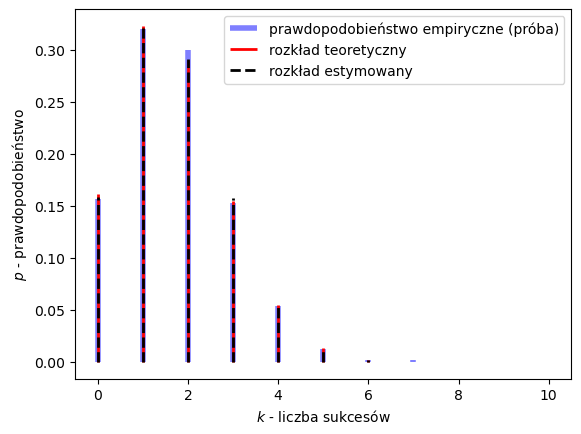

In [18]:
plt.vlines(ki,0,pi,color="blue",alpha=0.5,linewidth=4)
plt.vlines(k, 0, p, colors='r', lw=2)
plt.vlines(k,0,RVe.pmf(k),color="black",linewidth=2,linestyle="dashed")
plt.legend(["prawdopodobieństwo empiryczne (próba)","rozkład teoretyczny","rozkład estymowany"])
plt.xlabel("$k$ - liczba sukcesów")
plt.ylabel("$p$ - prawdopodobieństwo")
pass